In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

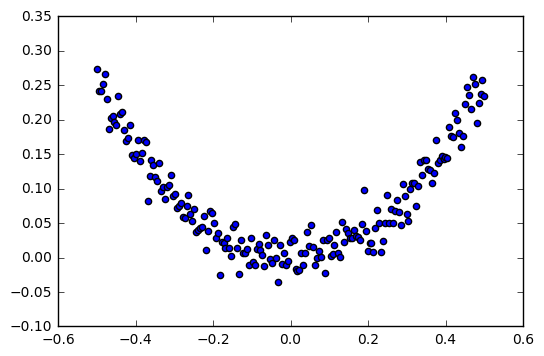

In [2]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]  #200行 1列
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data,y_data)
plt.show()

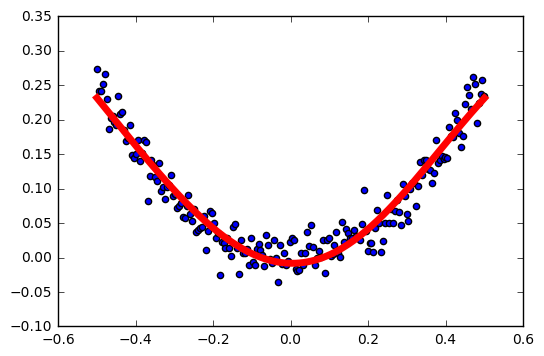

In [7]:
#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])  #不指定行数
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络结构：1-20-1
#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,20]))
biases_L1 = tf.Variable(tf.zeros([1,20]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([20,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
loss = tf.losses.mean_squared_error(y,prediction)
#使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(10000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()